<a href="https://colab.research.google.com/github/ShrutiUdagire/SupervisedLearning-Classification/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df=pd.read_excel("/content/drive/My Drive/Capstone Project/bank-full.xlsx")

In [0]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [0]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [0]:
# But we have UNknown values
# Checking counts for categorical values
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [0]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [0]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [0]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [0]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [0]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [0]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [0]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [0]:
df_update=df.copy()
df_update

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Which age group is subscribing to Term Deposit Plan ?

In [0]:
# X=df_update.drop('y',axis=1)
# y=df_update['y']
# converting categorical to num
# # Imbalanced data lets perfom 
# from imblearn.over_sampling import SMOTE
# smote=SMOTE(sampling_strategy='minority')
# X_sm,y_sm=smote.fit_sample(X,y)

Based on Quartile values

In [0]:
df_update['age_groups']="No values"
# Dividing the the age group based on the quartiles can be chnages as per our discussion
df_update['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [0]:
df_update.loc[(df_update['age']<=33) & (df_update['age']>=18),'age_groups']='18-33'
df_update.loc[(df_update['age']<=39) & (df_update['age']>=34),'age_groups']='34-39'
df_update.loc[(df_update['age']<=48) & (df_update['age']>=40),'age_groups']='40-48'
df_update.loc[(df_update['age']<=95) & (df_update['age']>=49),'age_groups']='49-95'

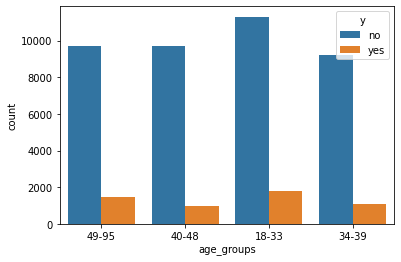

In [0]:
sns.countplot(df_update['age_groups'],hue=df_update['y'])

In [0]:
df18_33=df_update[(df_update['age']<=33) & (df_update['age']>=18)]
df34_39=df_update[(df_update['age']<=39) & (df_update['age']>=34)]
df40_48=df_update[(df_update['age']<=48) & (df_update['age']>=40)]
df49_95=df_update[(df_update['age']<=95) & (df_update['age']>=49)]
total=[]
names=['18-33','34-39','40-48','49-95']
list1=[df18_33,df34_39,df40_48,df49_95]
for i in list1:
  total.append(i.shape[0])
yes_count=[]
for i in list1:
  yes_count.append(i[i['y']=='yes'].count()['age'])
yes_count

[1782, 1059, 962, 1486]

In [0]:
age=pd.DataFrame()
age['Groups']=names
age['Total count']=total
age['Yes count']=yes_count
age['Percentage']=(age['Yes count']/age['Total count'])*100
age

,Groups,Total count,Yes count,Percentage
0,18-33,13083,1782,13.620729
1,34-39,10279,1059,10.302559
2,40-48,10661,962,9.023544
3,49-95,11188,1486,13.282088


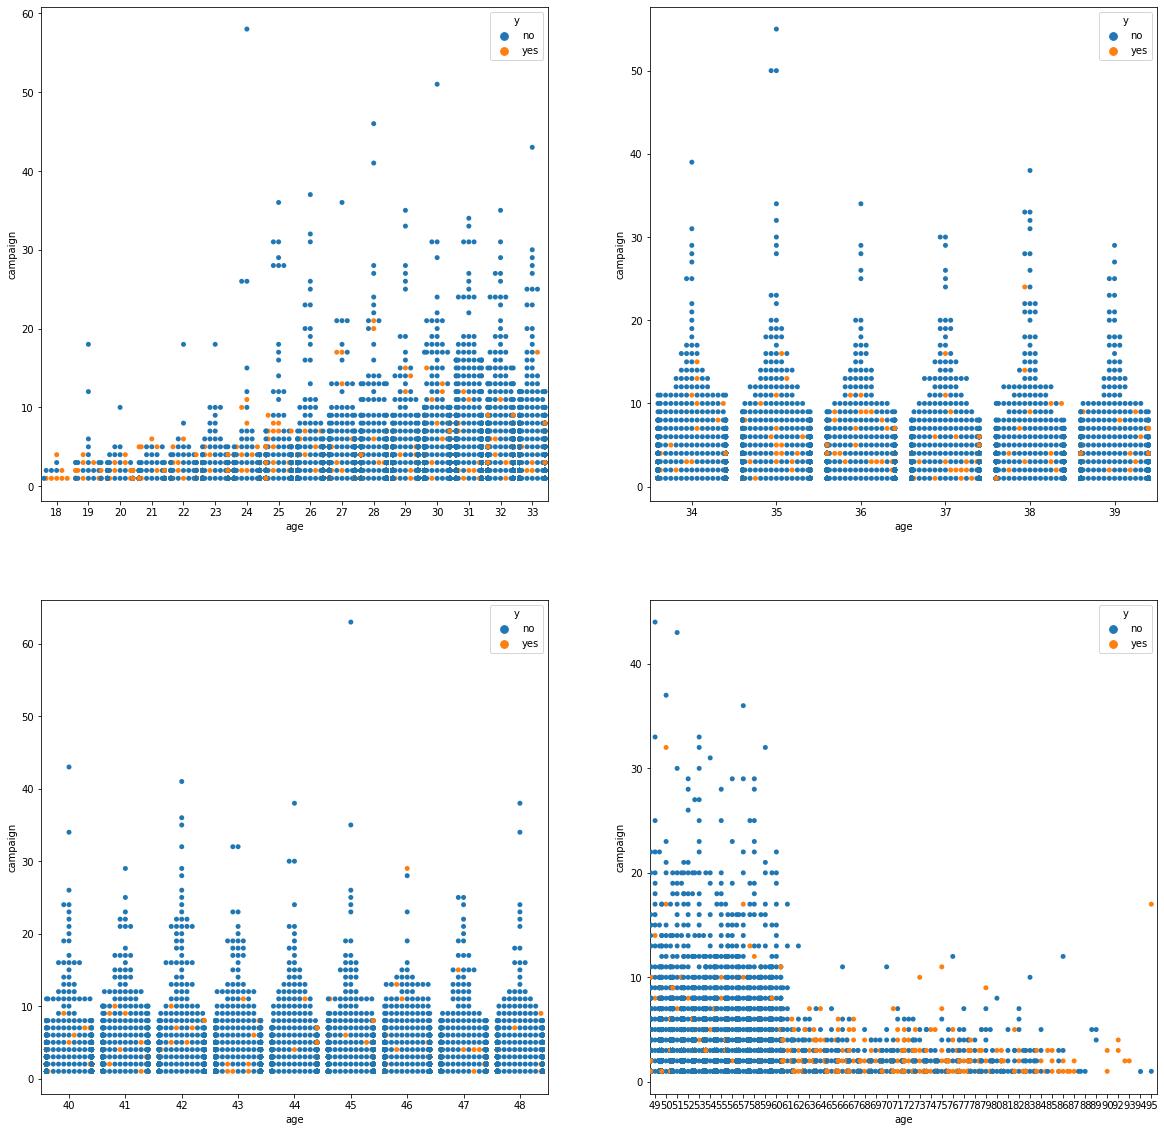

In [0]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.swarmplot(df18_33['age'],df18_33['campaign'],hue=df18_33['y'])
plt.subplot(2,2,2)
sns.swarmplot(df34_39['age'],df34_39['campaign'],hue=df34_39['y'])
plt.subplot(2,2,3)
sns.swarmplot(df40_48['age'],df40_48['campaign'],hue=df40_48['y'])
plt.subplot(2,2,4)
sns.swarmplot(df49_95['age'],df49_95['campaign'],hue=df49_95['y'])


1)from the above graph we can say that  the age limit 18-29 and 55+ age people are the clients who are subscriping the term deposit offer.

2)The people in age group  34- 48,not many people have subscripted to term deposit Plan.

Dividing age in 5 parts with differnce of 10

In [0]:
a1=df_update[(df_update['age']>=18) & (df_update['age']<=28)]
a2=df_update[(df_update['age']>=29) & (df_update['age']<=39)]
a3=df_update[(df_update['age']>=40) & (df_update['age']<=50)]
a4=df_update[(df_update['age']>=51) & (df_update['age']<=60)]
a5=df_update[(df_update['age']>=61)]

In [0]:
total=[]
list1=[a1,a2,a3,a4,a5]
for i in list1:
  total.append(i.shape[0])
print(total)
yes_count=[]
for i in list1:
  yes_count.append(i[i['y']=='yes'].count()['y'])
print(yes_count)

[4088, 19274, 12594, 8067, 1188]
[757, 2084, 1135, 811, 502]


In [0]:
age_final=pd.DataFrame()
age_final['Age Groups']=['18-28','29-39','40-50','51-60','61+']
age_final['Total']=total
age_final['Yes Count']=yes_count
age_final['Percetage']=(age_final['Yes Count']/age_final['Total'])*100
age_final.sort_values(by='Percetage',ascending=False)

,Age Groups,Total,Yes Count,Percetage
4,61+,1188,502,42.255892
0,18-28,4088,757,18.517613
1,29-39,19274,2084,10.812494
3,51-60,8067,811,10.053304
2,40-50,12594,1135,9.012228


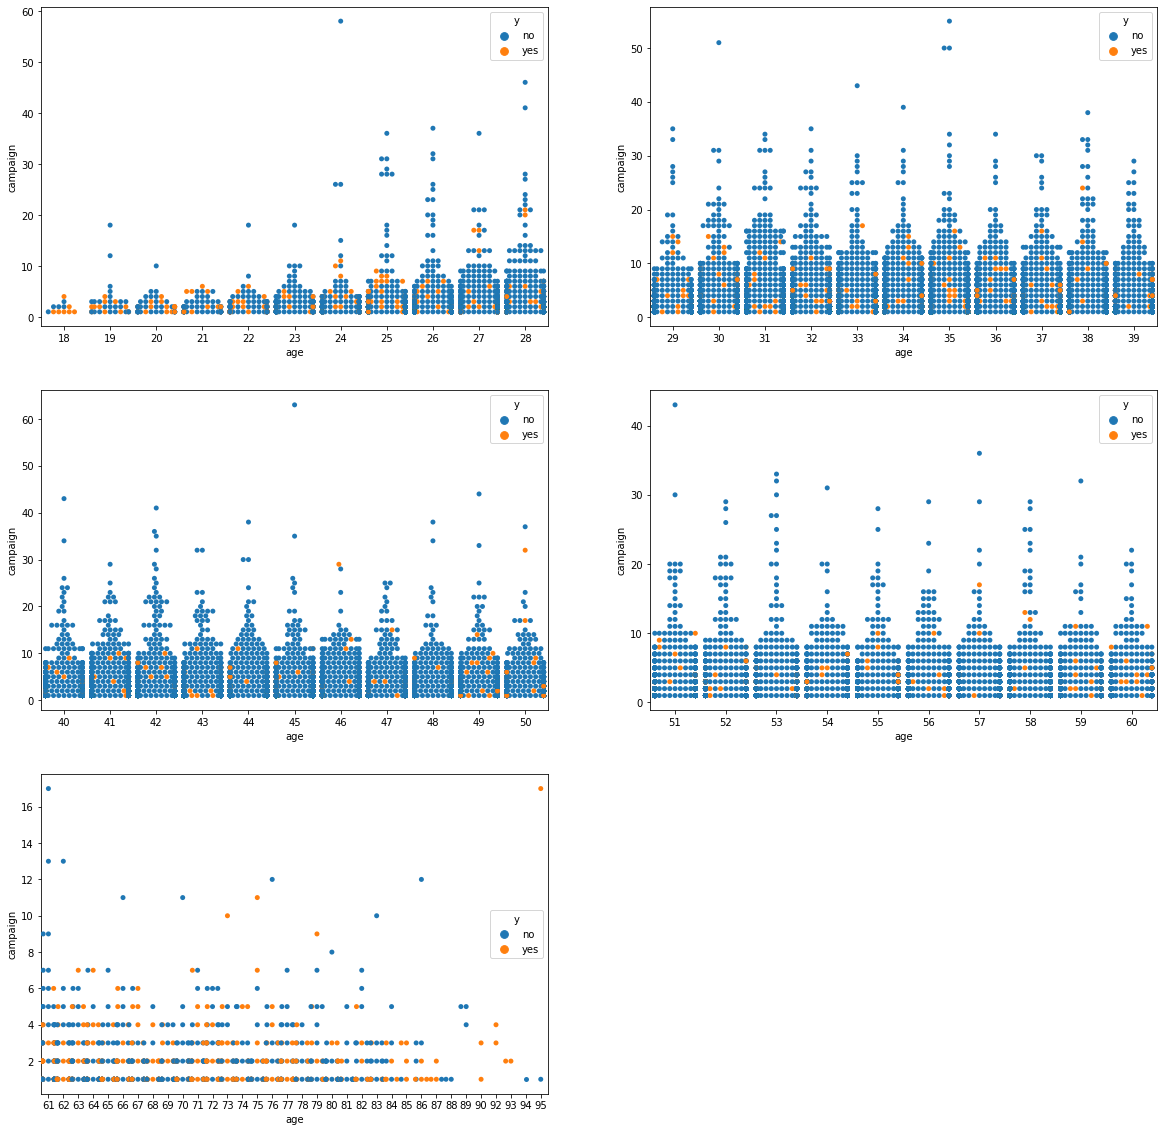

In [0]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.swarmplot(a1['age'],a1['campaign'],hue=a1['y'])
plt.subplot(3,2,2)
sns.swarmplot(a2['age'],a2['campaign'],hue=a2['y'])
plt.subplot(3,2,3)
sns.swarmplot(a3['age'],a3['campaign'],hue=a3['y'])
plt.subplot(3,2,4)
sns.swarmplot(a4['age'],a4['campaign'],hue=a4['y'])
plt.subplot(3,2,5)
sns.swarmplot(a5['age'],a5['campaign'],hue=a5['y'])



18-28age group people and  61+ age group are clients who have more Term Deposit Subscription rate



# Which job type of people have high subscription rate?

In [0]:
df_update['job'].value_counts().index

Index(['blue-collar', 'management', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object')

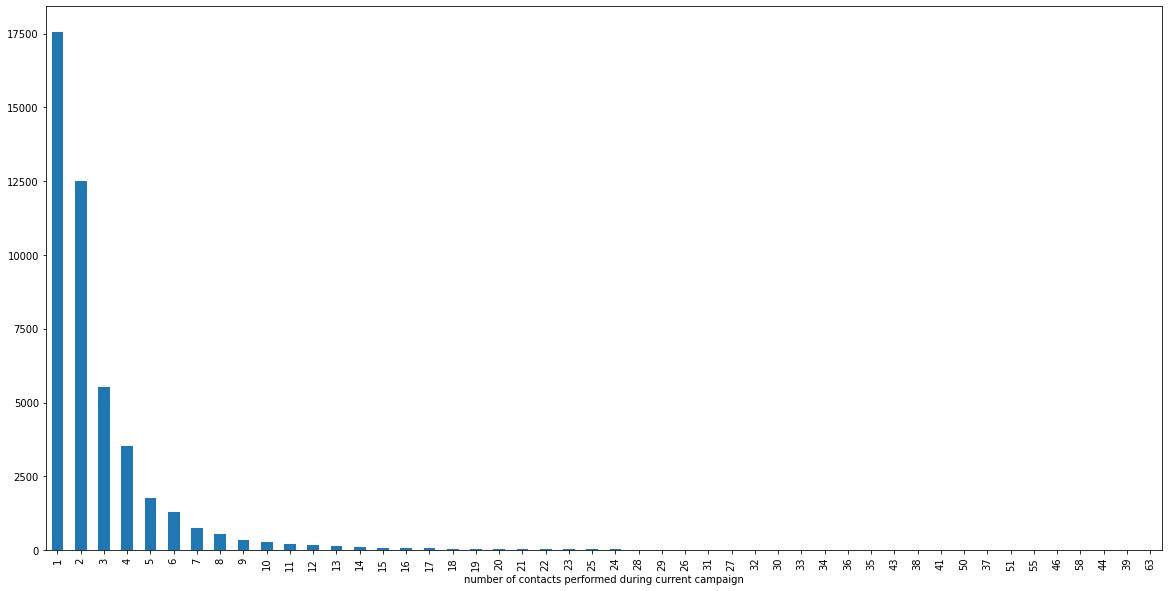

In [0]:
plt.figure(figsize=(20,10))
plt.xlabel("number of contacts performed during current campaign")
df_update['campaign'].value_counts().plot(kind='bar')

In [0]:
total_count_in_each_group=[]
yes_count=[]
no_count=[]
title=[]
for i in df_update['job'].value_counts().index:
  df_job=pd.DataFrame()
  df_job=df_update[df_update['job']==i]
  title.append(i)
  total_count_in_each_group.append(df_job.shape[0])
  yes_count.append(df_job[df_job['y']=='yes'].count()['y'])
  no_count.append(df_job[df_job['y']=='no'].count()['y'])
df_jobs=pd.DataFrame()
df_jobs['Job Title']=title
df_jobs['Total']=total_count_in_each_group
df_jobs['Yes']=yes_count
df_jobs['No']=no_count
df_jobs

,Job Title,Total,Yes,No
0,blue-collar,9732,708,9024
1,management,9458,1301,8157
2,technician,7597,840,6757
3,admin.,5171,631,4540
4,services,4154,369,3785
5,retired,2264,516,1748
6,self-employed,1579,187,1392
7,entrepreneur,1487,123,1364
8,unemployed,1303,202,1101
9,housemaid,1240,109,1131


([<matplotlib.axis.XTick at 0x7fbbe6ad2828>,
 [Text(0, 0, 'blue-collar'),
  Text(0, 0, 'management'),
  Text(0, 0, 'technician'),
  Text(0, 0, 'admin.'),
  Text(0, 0, 'services'),
  Text(0, 0, 'retired'),
  Text(0, 0, 'self-employed'),
  Text(0, 0, 'entrepreneur'),
  Text(0, 0, 'unemployed'),
  Text(0, 0, 'housemaid'),
  Text(0, 0, 'student'),
  Text(0, 0, 'unknown')])

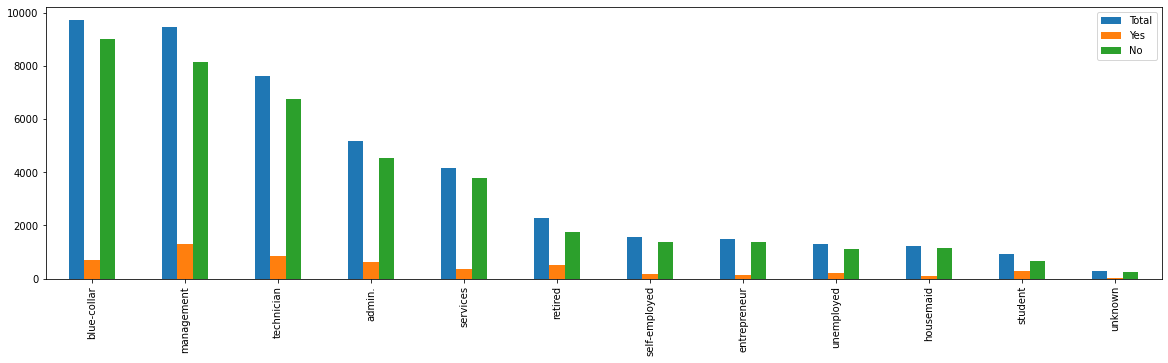

In [0]:
labels=df_jobs['Job Title']
positions = np.arange(0,12,1)
df_jobs.plot(kind='bar',figsize=(20,5))
plt.xticks(positions, labels)

In [0]:
df_jobs_final=pd.DataFrame()
df_jobs_final['Job Title']=title
df_jobs_final['Percentage_yes']=(df_jobs['Yes']/df_jobs['Total'])*100
df_jobs_final['Percentage_no']=(df_jobs['No']/df_jobs['Total'])*100
df_jobs_final=df_jobs_final.sort_values('Percentage_yes',ascending=False)
df_jobs_final

,Job Title,Percentage_yes,Percentage_no
10,student,28.678038,71.321962
5,retired,22.791519,77.208481
8,unemployed,15.502686,84.497314
1,management,13.755551,86.244449
3,admin.,12.202669,87.797331
6,self-employed,11.842939,88.157061
11,unknown,11.805556,88.194444
2,technician,11.056996,88.943004
4,services,8.883004,91.116996
9,housemaid,8.790323,91.209677


([<matplotlib.axis.XTick at 0x7fbbebf1d748>,
 [Text(0, 0, 'student'),
  Text(0, 0, 'retired'),
  Text(0, 0, 'unemployed'),
  Text(0, 0, 'management'),
  Text(0, 0, 'admin.'),
  Text(0, 0, 'self-employed'),
  Text(0, 0, 'unknown'),
  Text(0, 0, 'technician'),
  Text(0, 0, 'services'),
  Text(0, 0, 'housemaid'),
  Text(0, 0, 'entrepreneur'),
  Text(0, 0, 'blue-collar')])

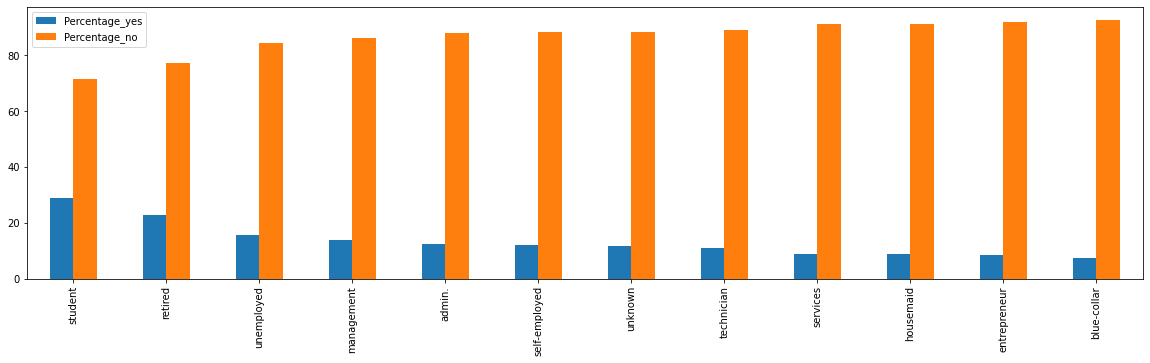

In [0]:
labels=df_jobs_final['Job Title'].tolist()
position=df_jobs_final['Job Title'].index
df_jobs_final.plot(kind='bar',figsize=(20,5))
plt.xticks(positions, labels)

1)From above graph we can see that students and retired people are the clients who have high percentage of of subscription rate.

2)Blue-collar,entrepreneur,housemaid,services have low are few jobs that have low subscription rate and high no subscriped Rate


# Is Marital state contributing to  Term Deposit Plan



In [0]:
df_married=df_update[df_update['marital']=='married']
df_single=df_update[df_update['marital']=='single']
df_divorced=df_update[df_update['marital']=='divorced']
married=df_update['marital'].value_counts().to_frame()
married

,marital
married,27214
single,12790
divorced,5207


In [0]:
yes_count=[]
yes_count.append(df_married[df_married['y']=='yes'].count()[1])
yes_count.append(df_single[df_single['y']=='yes'].count()[1])
yes_count.append(df_divorced[df_divorced['y']=='yes'].count()[1])
married['Subscription count']=yes_count

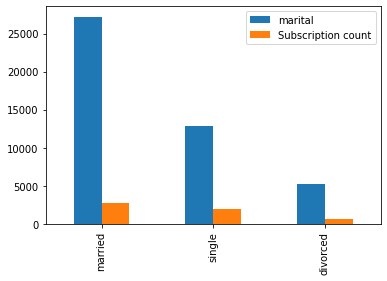

In [0]:
married.plot(kind='bar')

In [0]:
married['Percentage']=(married['Subscription count']/married['marital'])*100
married

,marital,Subscription count,Percentage
married,27214,2755,10.123466
single,12790,1912,14.949179
divorced,5207,622,11.945458


As per the visualization., 'Marital' and y dnt have a strong relationship



# Is Education state contributing to  Term Deposit Plan


In [0]:
education=df_update['education'].value_counts().to_frame()
education

,education
secondary,23202
tertiary,13301
primary,6851
unknown,1857


In [0]:
df_secondary=df_update[df_update['education']=='secondary']
df_tertiary=df_update[df_update['education']=='tertiary']
df_primary=df_update[df_update['education']=='primary']
df_unknown=df_update[df_update['education']=='unknown']

In [0]:
yes_count=[]
yes_count.append(df_secondary[df_secondary['y']=='yes'].count()[1])
yes_count.append(df_tertiary[df_tertiary['y']=='yes'].count()[1])
yes_count.append(df_primary[df_primary['y']=='yes'].count()[1])
yes_count.append(df_unknown[df_unknown['y']=='yes'].count()[1])
education['Subscription count']=yes_count

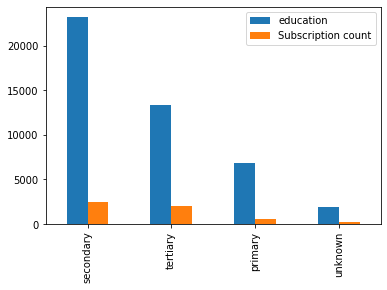

In [0]:
education.plot(kind='bar')

In [0]:
education['Percentage']=(education['Subscription count']/education['education'])*100
education

,education,Subscription count,Percentage
secondary,23202,2450,10.559435
tertiary,13301,1996,15.006390
primary,6851,591,8.626478
unknown,1857,252,13.570275


Columns 'education' and 'y' dont show a strong relstionship

# Previous column and number of Unknown values




In [0]:
success=df[(df['poutcome']=='success')].count()['poutcome']
failure=df[(df['poutcome']=='failure')].count()['poutcome']
unknown=df[(df['poutcome']=='unknown')].count()['poutcome']
other=df[(df['poutcome']=='other')].count()['poutcome']
previous_campaign=pd.DataFrame({'Status':['Success','Failure','Unknown','Others'],"Values":[success,failure,unknown,other]})
previous_campaign['Percentage']=(previous_campaign['Values']/45211)*100
previous_campaign

,Status,Values,Percentage
0,Success,1511,3.342107
1,Failure,4901,10.840282
2,Unknown,36959,81.747805
3,Others,1840,4.069806


81% of values are Unknown value in poutcome column

Can we drop this column????

# Is balance contributin to TDP?

Working on this not completed

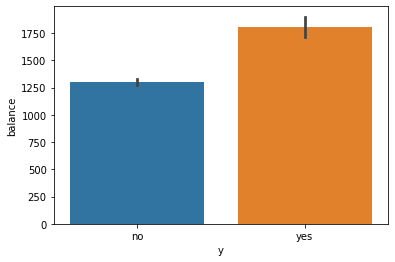

In [0]:
sns.barplot(df_update['y'],df_update['balance'])

1804.2679145396105
1303.7149691899203


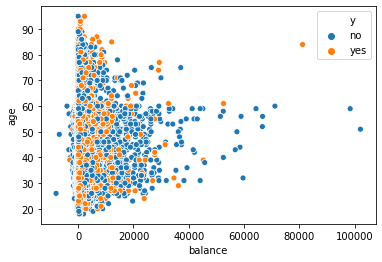

In [0]:
yes=df_update[df_update['y']=='yes']
no=df_update[df_update['y']=='no']
print(yes['balance'].mean())
print(no['balance'].mean())

sns.scatterplot(df_update['balance'],df_update['age'],hue=df_update['y'])

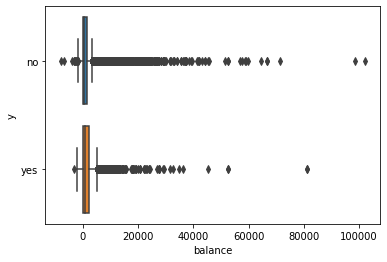

In [0]:
sns.boxplot(df['balance'],df['y'])

# Credit and target

Total Count 45211
1.8026586450200173
98.19734135497998


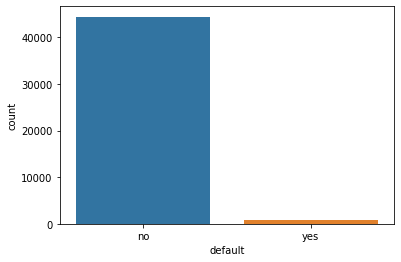

In [0]:
default_yes=df_update[df_update['default']=='yes']
default_no=df_update[df_update['default']=='no']
total=df_update.shape[0]
yes=default_yes.count()['y']
no=default_no.count()['y']
sns.countplot(df_update['default'])
print("Total Count",total)
print((yes/total)*100)
print((no/total*100))

1.8% has default in credit

98.1% are those who are non default in their credit

In [0]:
yes=default_yes[default_yes['y']=='yes'].count()['y']
no=default_yes[default_yes['y']=='no'].count()['y']
total=default_yes.count()['y']
print("Default")
print(total)
print((yes/total)*100)
print((no/total)*100)

Default
815
6.38036809815951
93.61963190184049


From the people who have default in credits,out of that 6% have subscripted to Term Deposit plan

In [0]:
yes=default_no[default_no['y']=='yes'].count()['y']
no=default_no[default_no['y']=='no'].count()['y']
total=default_no.count()['y']
print("Non default")
print(total)
print((yes/total)*100)
print((no/total)*100)

Non default
44396
11.796107757455626
88.20389224254437


From the people who have non default on credit, out of that 11% of the clients have subscribed to  Term Deposit plan

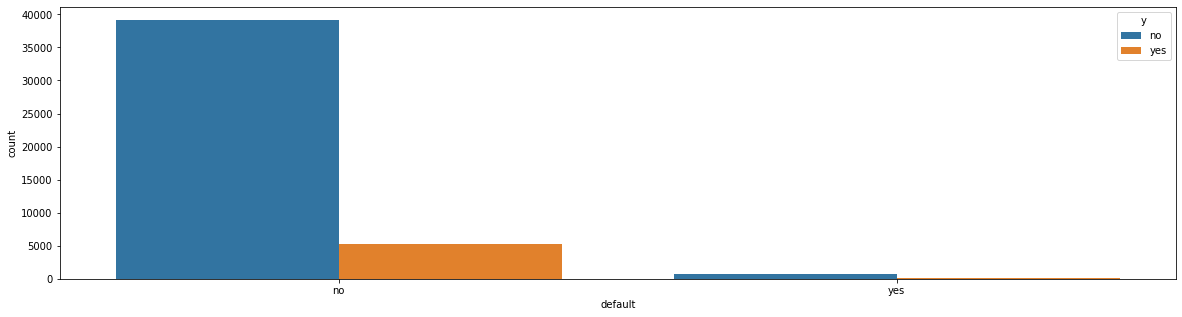

In [0]:
plt.figure(figsize=(20,5))
sns.countplot(df_update['default'],hue=df_update['y'])

More clients with Non Default on credit are subscripted to Term Deposit Plan

# Housing Loan and Target 

Total counts
We have  55.583818097365686  % who have house loan and count is  25130
We have  44.416181902634314  % who have dont house loan and count is  20081


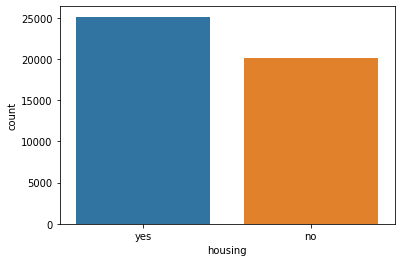

In [0]:
default_yes=df_update[df_update['housing']=='yes']
default_no=df_update[df_update['housing']=='no']

total=df_update.shape[0]
yes=default_yes.count()['y']
no=default_no.count()['y']
sns.countplot(df_update['housing'])

print("Total counts")
print("We have ",(yes/total)*100," % who have house loan and count is ", yes)
print("We have ",(no/total)*100," % who have dont house loan and count is ",no)

In [0]:
yes=default_yes[default_yes['y']=='yes'].count()['y']
no=default_yes[default_yes['y']=='no'].count()['y']
total=default_yes.count()['y']
print("Total that have housing loan are",total)
print("Out of the total",(yes/total)*100," % have subscribed to Term Deposit Plan")
print("Out of the total",(no/total)*100," % have not subscribed to Term Deposit Plan")

Total that have housing loan are 25130
Out of the total 7.699960206923995  % have subscribed to Term Deposit Plan
Out of the total 92.30003979307601  % have not subscribed to Term Deposit Plan


In [0]:
yes=default_no[default_no['y']=='yes'].count()['y']
no=default_no[default_no['y']=='no'].count()['y']
total=default_no.count()['y']
print("Total number of people that don't housing loan are",total)
print("Out of the total",(yes/total)*100," % have subscribed to Term Deposit Plan")
print("Out of the total",(no/total)*100," % have not subscribed to Term Deposit Plan")

Total number of people that don't housing loan are 20081
Out of the total 16.70235546038544  % have subscribed to Term Deposit Plan
Out of the total 83.29764453961455  % have not subscribed to Term Deposit Plan


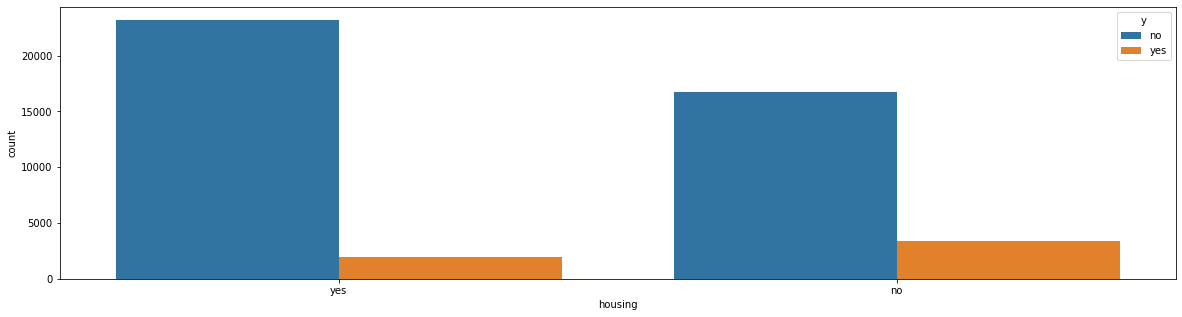

In [0]:
plt.figure(figsize=(20,5))
sns.countplot(df_update['housing'],hue=df_update['y'])

There are more clients who dont have a housing loan and have subscribed to Term Deposit Plan.

We have 44.41% of people who dnt have housing loan and out of that 16.70% people have subscribed to Term Deposit plan

# Personal Loan And target column

Total counts
We have  16.022649355245406  % who have personal loan and count is  7244
We have  83.9773506447546  % who have dont personal loan and count is  37967


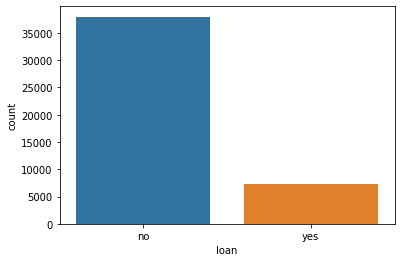

In [0]:
default_yes=df_update[df_update['loan']=='yes']
default_no=df_update[df_update['loan']=='no']

total=df_update.shape[0]
yes=default_yes.count()['y']
no=default_no.count()['y']
sns.countplot(df_update['loan'])

print("Total counts")
print("We have ",(yes/total)*100," % who have personal loan and count is ", yes)
print("We have ",(no/total)*100," % who have dont personal loan and count is ",no)

In [0]:
yes=default_yes[default_yes['y']=='yes'].count()['y']
no=default_yes[default_yes['y']=='no'].count()['y']
total=default_yes.count()['y']
print("Total that have Personal loan are",total)
print("Out of the total",(yes/total)*100," % have subscribed to Term Deposit Plan")
print("Out of the total",(no/total)*100," % have not subscribed to Term Deposit Plan")

Total that have Personal loan are 7244
Out of the total 6.681391496410822  % have subscribed to Term Deposit Plan
Out of the total 93.31860850358918  % have not subscribed to Term Deposit Plan


In [0]:
yes=default_no[default_no['y']=='yes'].count()['y']
no=default_no[default_no['y']=='no'].count()['y']
total=default_no.count()['y']
print("Total number of people that don't have personal loan are",total)
print("Out of the total",(yes/total)*100," % have subscribed to Term Deposit Plan")
print("Out of the total",(no/total)*100," % have not subscribed to Term Deposit Plan")

Total number of people that don't have personal loan are 37967
Out of the total 12.655727342165566  % have subscribed to Term Deposit Plan
Out of the total 87.34427265783444  % have not subscribed to Term Deposit Plan


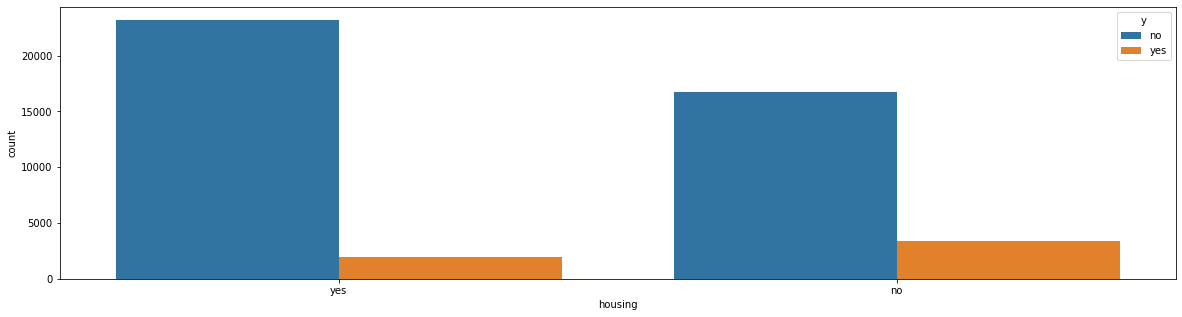

In [0]:
plt.figure(figsize=(20,5))
sns.countplot(df_update['housing'],hue=df_update['y'])

There are more clients who dont have a personal loan and have subscribed to Term Deposit Plan.

We have 83.97% of people who dnt have a personal loan and out of that 12.65% people have subscribed to Term Deposit plan

# Communication mode
Out of total 45211, 13020 are unknown

In [0]:
df_update['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

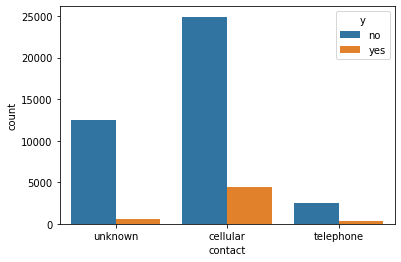

In [0]:
sns.countplot(df['contact'],hue=df['y'])

# Month wise subscription Rate

In [0]:
df_update['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [0]:
df_update.loc[df_update['month']=='jan','month']=1
df_update.loc[df_update['month']=='feb','month']=2
df_update.loc[df_update['month']=='mar','month']=3
df_update.loc[df_update['month']=='apr','month']=4
df_update.loc[df_update['month']=='may','month']=5
df_update.loc[df_update['month']=='jun','month']=6
df_update.loc[df_update['month']=='jul','month']=7
df_update.loc[df_update['month']=='aug','month']=8
df_update.loc[df_update['month']=='sep','month']=9
df_update.loc[df_update['month']=='oct','month']=10
df_update.loc[df_update['month']=='nov','month']=11
df_update.loc[df_update['month']=='dec','month']=12

In [0]:
dict1=dict(list(df_update.groupby(['month','y'])))
list1=[1,2,3,4,5,6,7,8,9,10,11,12]
no=[]
yes=[]
months=[]
for i in list1:
  months.append(i)
  for j in ['no','yes']:
    if(j=='no'):
      no.append(dict1[i,j].count()['y'])
    else:
      yes.append(dict1[i,j].count()['y'])

total_count_per_month=[]
dict2=dict(list(df_update.groupby(['month'])))
for i in list1:
  total_count_per_month.append(dict2[i].count()['y'])

      
print(months)
print(total_count_per_month)
print(yes)
print(no)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1403, 2649, 477, 2932, 13766, 5341, 6895, 6247, 579, 738, 3970, 214]
[142, 441, 248, 577, 925, 546, 627, 688, 269, 323, 403, 100]
[1261, 2208, 229, 2355, 12841, 4795, 6268, 5559, 310, 415, 3567, 114]


In [0]:
month_wise=pd.DataFrame()
month_wise['Months']=months
month_wise['Total ENteries per month']=total_count_per_month
month_wise['Count of Subscribed']=yes
month_wise['Count of Not Sub']=no
month_wise['Subscription Rate']=(month_wise['Count of Subscribed']/month_wise['Total ENteries per month'])*100
month_wise['Not Sub Rate']=(month_wise['Count of Not Sub']/month_wise['Total ENteries per month'])*100

In [0]:
month_wise=month_wise.sort_values("Subscription Rate",ascending=False)
month_wise

,Months,Total ENteries per month,Count of Subscribed,Count of Not Sub,Subscription Rate,Not Sub Rate
2,3,477,248,229,51.991614,48.008386
11,12,214,100,114,46.728972,53.271028
8,9,579,269,310,46.459413,53.540587
9,10,738,323,415,43.766938,56.233062
3,4,2932,577,2355,19.679400,80.320600
1,2,2649,441,2208,16.647792,83.352208
7,8,6247,688,5559,11.013286,88.986714
5,6,5341,546,4795,10.222805,89.777195
10,11,3970,403,3567,10.151134,89.848866
0,1,1403,142,1261,10.121169,89.878831


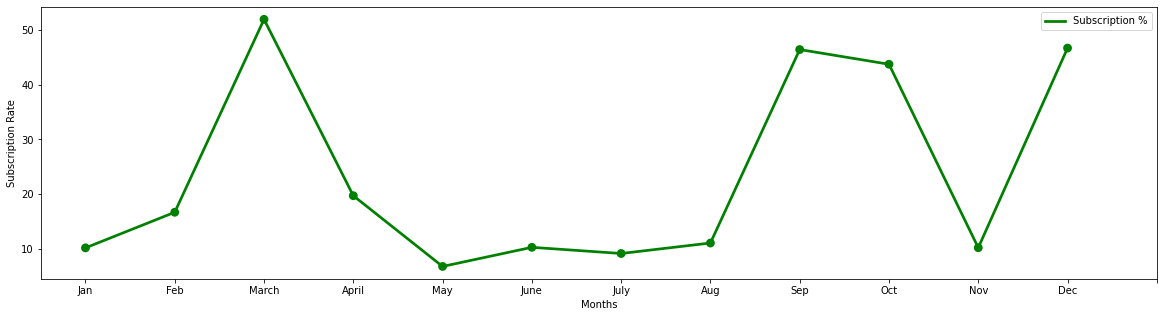

In [0]:
plt.figure(figsize=(20,5))
labels=['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
position=np.arange(0,13,1)
sns.pointplot(month_wise['Months'],month_wise['Subscription Rate'],color='g')
plt.xticks(position,labels)
plt.legend(['Subscription %'])

([<matplotlib.axis.XTick at 0x7fbbebd07208>,
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'March'),
  Text(0, 0, 'April'),
  Text(0, 0, 'May'),
  Text(0, 0, 'June'),
  Text(0, 0, 'July'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec')])

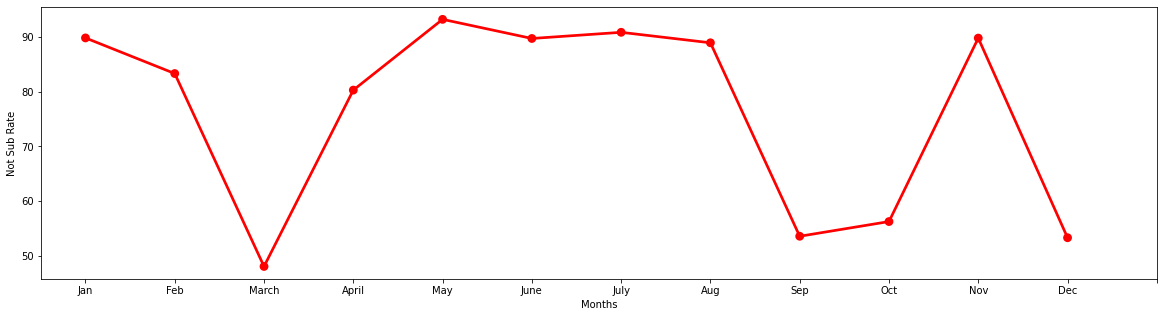

In [0]:
plt.figure(figsize=(20,5))
labels=['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
position=np.arange(0,13,1)
sns.pointplot(month_wise['Months'],month_wise['Not Sub Rate'],color='r')
plt.xticks(position,labels)


In [0]:
month_final=month_wise[['Months','Subscription Rate','Not Sub Rate']]
month_final=month_final.set_index('Months')

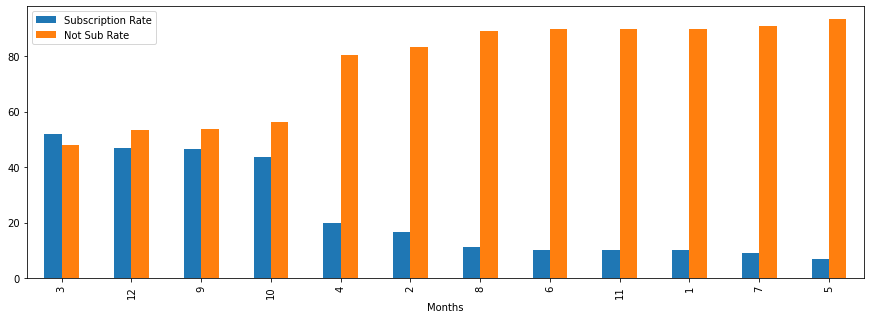

In [0]:
month_final.plot(kind='bar',figsize=(15,5))


We can see March Month has highest subscription rate followed by december and September

# CAll Duration

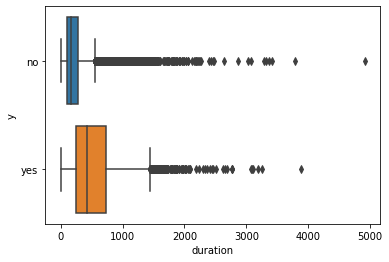

In [0]:
sns.boxplot(df_update['duration'],df_update['y'])

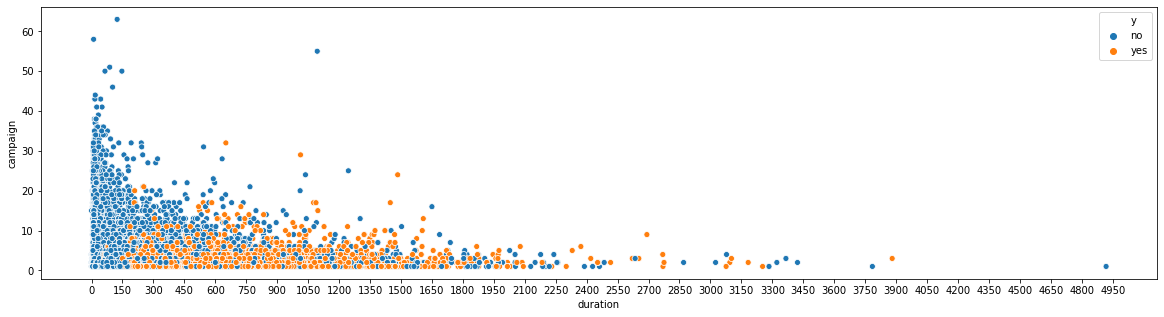

In [0]:
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,5000,150))
sns.scatterplot(df_update['duration'],df['campaign'],hue=df_update['y'])

Call duration with clients less than 150 seconds Almost all are No Subscription even if the client is called for more than 20 times.

Nothing much



# Campaign

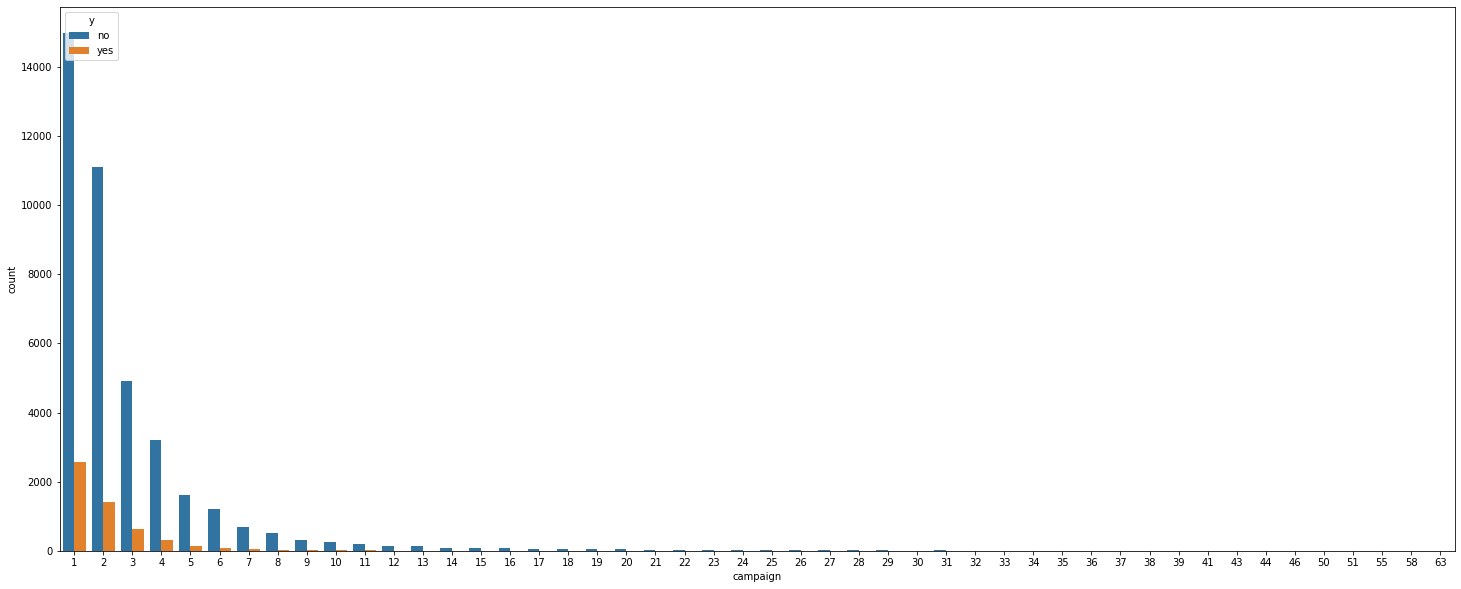

In [0]:
plt.figure(figsize=(25,10))
sns.countplot(df['campaign'],hue=df['y'])

In [0]:
df_15=df_update[(df_update['campaign']<=15) ]
df_30=df_update[(df_update['campaign']>=16) & (df_update['campaign']<=30) ]
df_31=df_update[(df_update['campaign']>=31) ]

In [0]:
total_calls=[]
yes=[]
no=[]
for i in[df_15,df_30,df_31]:
  total_calls.append(i.count()['campaign'])
  yes.append(i[i['y']=='yes'].count()['y'])
  no.append(i[i['y']=='no'].count()['y'])

print(total_calls)
print(yes)
print(no)

[44681, 471, 59]
[5276, 12, 1]
[39405, 459, 58]


In [0]:
campaigns=pd.DataFrame()
campaigns['No.of call']=['Till 15','Till 30','30+ more']
campaigns['Total no of Calls']=total_calls
campaigns['Took Subscription']=yes
campaigns['No Subscription']=no
campaigns['Rate of Sub']=(campaigns['Took Subscription']/campaigns['Total no of Calls'])*100

In [0]:
campaigns

,No.of call,Total no of Calls,Took Subscription,No Subscription,Rate of Sub
0,Till 15,44681,5276,39405,11.808151
1,Till 30,471,12,459,2.547771
2,30+ more,59,1,58,1.694915


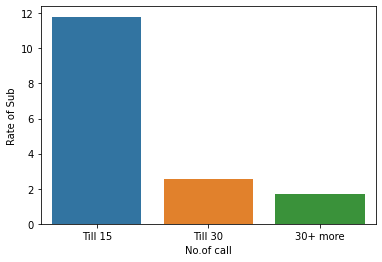

In [0]:
sns.barplot(campaigns['No.of call'],campaigns['Rate of Sub'])

Calling more than 15 times is not increasing the subscription Rate

#previous

In [0]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
